<a href="https://colab.research.google.com/github/DannyRoss123/AIXHW3/blob/main/HW9AIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##HW9 AIX

For this homework, I’ll be exploring explainable AI in LLMs by diving into and visualizing the embedding space of certain words and features using three different techniques—t-SNE, PCA, and UMAP. The embedding space plays a crucial role in understanding how an LLM represents relationships between words and expressions. By applying these dimensionality reduction methods, I’ll analyze how different words cluster together and compare how each technique captures structure in the data. While PCA maintains linear relationships, t-SNE and UMAP focus more on preserving local and global structures in the embeddings. This will provide insight into how LLMs process and encode meaning in text.



##Imports and Loading Embedding Model
Our first step in visualizing the results is first to import all of the libraries that are necessary, followed by loading in the embedding model.

In [ ]:
!pip install -U sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 30.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
from sentence_transformers import SentenceTransformer

# Load the embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## Create Sentences for the Model

Next, we’ll create a list of simple sentences to feed into the embedding model. The sentences are organized into five distinct categories, with six sentences in each group. Once passed through the model, each sentence will be transformed into a high-dimensional vector (embedding) that captures its semantic meaning.

These embeddings exist in a multidimensional space, which makes them difficult to interpret directly. That’s why we’ll later apply dimensionality reduction techniques to visualize them in two dimensions.


In [ ]:
#create a list of sentences
sentences = [
    # Food & Drink
    "I love eating pizza on weekends.",
    "Ice cream is my favorite dessert.",
    "Sushi is a delicious Japanese dish.",
    "Fresh fruit is a healthy snack.",
    "Coffee gives me energy in the morning.",
    "I enjoy cooking pasta with garlic and olive oil.",

    # Sports
    "I play basketball with my friends every Friday.",
    "Soccer is the most popular sport in the world.",
    "Serena Williams is a legendary tennis player.",
    "I went for a morning run in the park.",
    "Swimming is a great full-body workout.",
    "The Olympics bring athletes together from all over the world.",

    # Technology & AI
    "Artificial intelligence is changing the future.",
    "I’m learning how to code in Python.",
    "Machine learning can make predictions from data.",
    "Neural networks are inspired by the human brain.",
    "Technology evolves rapidly every year.",
    "I built a website using HTML and CSS.",

    # Nature & Environment
    "The forest was peaceful and quiet.",
    "Mountains are breathtaking in the early morning.",
    "Rain helps plants and trees grow.",
    "The ocean waves crashed against the shore.",
    "I love hiking through national parks.",
    "Protecting the environment is important for our future.",

    # Emotions & Daily Life
    "I felt happy after talking to my friend.",
    "Sometimes I get nervous before big presentations.",
    "Reading a good book calms me down.",
    "Music helps me relax when I’m stressed.",
    "I had a productive day at work.",
    "Spending time with family makes me feel loved."
]

# Get the embeddings
embeddings = model.encode(sentences, show_progress_bar=True)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

## Using PCA

Now that we’ve successfully embedded a list of sentences using our embedding model, the next step is to visualize those embeddings in a meaningful way. To do this, we’ll apply PCA — a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while preserving as much variance as possible.

In our case, we’ll reduce the 384-dimensional sentence embeddings down to **2 dimensions** so we can easily visualize them on a 2D plot. This allows us to get a rough idea of how the model perceives similarities and differences between sentences.


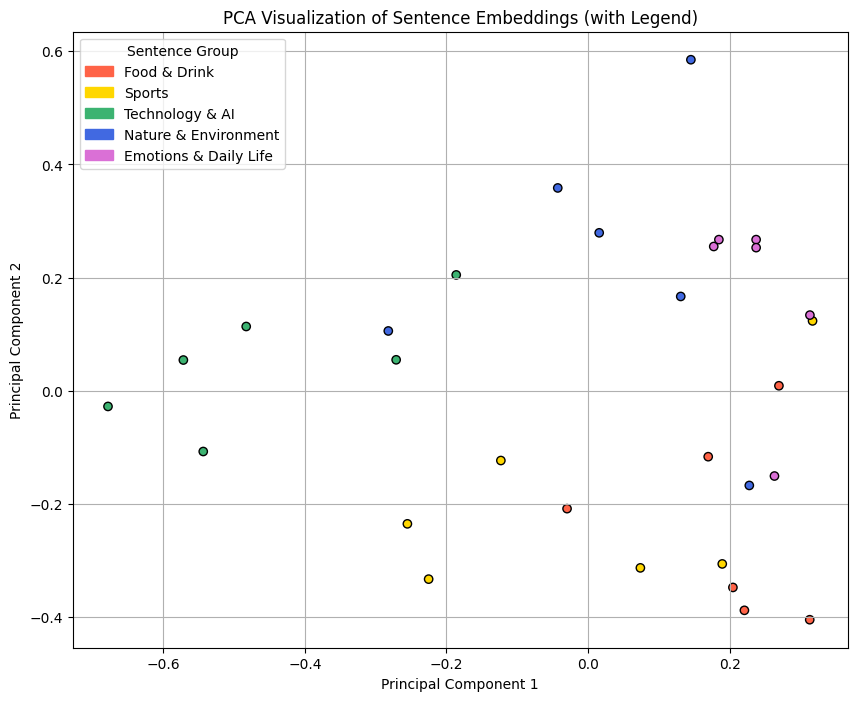

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Define sentence groups
groups = ['Food & Drink'] * 6 + ['Sports'] * 6 + ['Technology & AI'] * 6 + ['Nature & Environment'] * 6 + ['Emotions & Daily Life'] * 6
unique_groups = list(set(groups))

# Define colors for each group
group_colors = {
    'Food & Drink': 'tomato',
    'Sports': 'gold',
    'Technology & AI': 'mediumseagreen',
    'Nature & Environment': 'royalblue',
    'Emotions & Daily Life': 'orchid'
}
colors = [group_colors[g] for g in groups]

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# Plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=colors, edgecolors='k')                  #from chat GPT at 6:55 pm 3/26

# Create custom legend handles
legend_handles = [Patch(color=color, label=group) for group, color in group_colors.items()]
plt.legend(handles=legend_handles, title="Sentence Group", loc="best", fontsize=10)                  #from chat GPT at 7:00 pm

plt.title('PCA Visualization of Sentence Embeddings (with Legend)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


#PCA visualization results
This plot shows the 2D PCA projection of the sentence embeddings, color-coded by their respective topic categories. We can observe that some categories form loose clusters—for example, the Technology & AI sentences (green) are grouped on the left side, while Emotions & Daily Life (purple) appears more clustered toward the top right. PCA helps preserve global variance, which can reveal general groupings but may not fully capture more subtle local relationships. Overall, this visualization provides a useful first look into how the model organizes sentence meanings in its embedding space.

## Using t-SNE

Now that we have visualized the embeddings using PCA, the next step is to apply t-SNE — a nonlinear dimensionality reduction technique that is particularly good at capturing local structure in high-dimensional data.

Unlike PCA, which focuses on preserving global variance, t-SNE emphasizes maintaining the relative distances between nearby points. This makes it especially useful for visualizing **clusters or groups** that are semantically similar. In our case, it will help us better understand how sentences within the same category relate to each other in the embedding space.


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


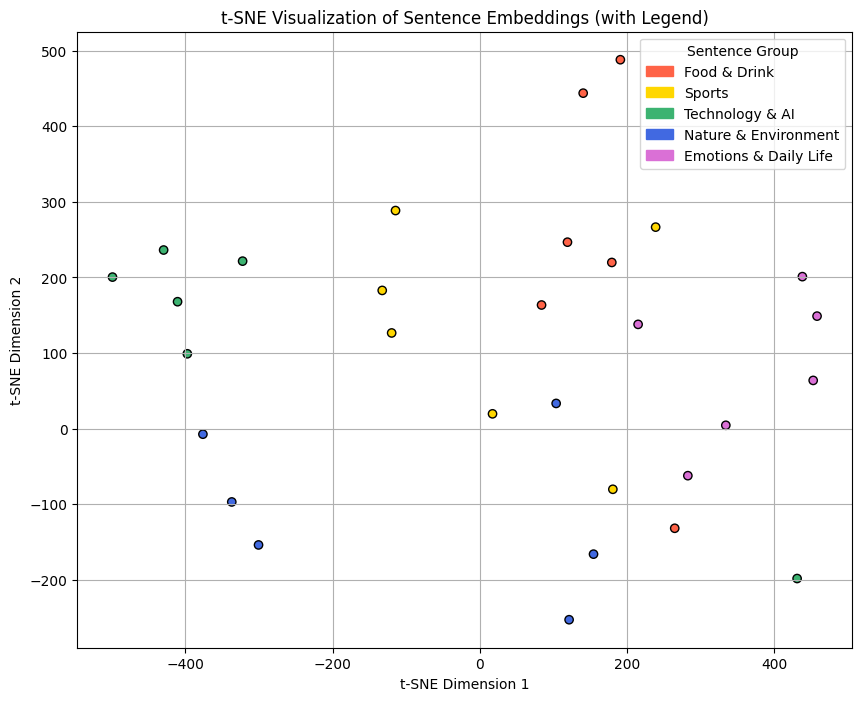

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

# Define sentence groups (same order as before)
groups = ['Food & Drink'] * 6 + ['Sports'] * 6 + ['Technology & AI'] * 6 + ['Nature & Environment'] * 6 + ['Emotions & Daily Life'] * 6
group_colors = {
    'Food & Drink': 'tomato',
    'Sports': 'gold',
    'Technology & AI': 'mediumseagreen',
    'Nature & Environment': 'royalblue',
    'Emotions & Daily Life': 'orchid'
}
colors = [group_colors[g] for g in groups]

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=5, learning_rate=200, n_iter=1000, random_state=42)      #From chat GPT at 7:46pm 3/26/25
tsne_result = tsne.fit_transform(embeddings)

# Plot t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=colors, edgecolors='k')

# Create legend
legend_handles = [Patch(color=color, label=group) for group, color in group_colors.items()]
plt.legend(handles=legend_handles, title="Sentence Group", loc="best", fontsize=10)

plt.title('t-SNE Visualization of Sentence Embeddings (with Legend)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()


#t-SNE visualization
This plot shows the 2D t-SNE projection of the sentence embeddings, where each point is color-coded by its sentence group. Compared to PCA, t-SNE reveals clearer separation between several groups — especially Emotions & Daily Life (purple) and Technology & AI (green), which form well-defined clusters. This is because t-SNE prioritizes local relationships, making it easier to spot semantic similarity among nearby sentences. While the distances and axes aren’t globally meaningful, the clusters provide strong visual evidence of how the model organizes related concepts in embedding space.



## Using UMAP

Next, we’ll use our final method — UMAP — to visualize the sentence embeddings in a 2-dimensional space. UMAP is a nonlinear dimensionality reduction technique that balances both **local** and **global** structure, often producing more meaningful clusters than PCA or t-SNE. It's particularly effective at preserving the overall topology of the data, making it a powerful tool for exploring relationships between sentence groups.


In [ ]:
!pip install umap-learn

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


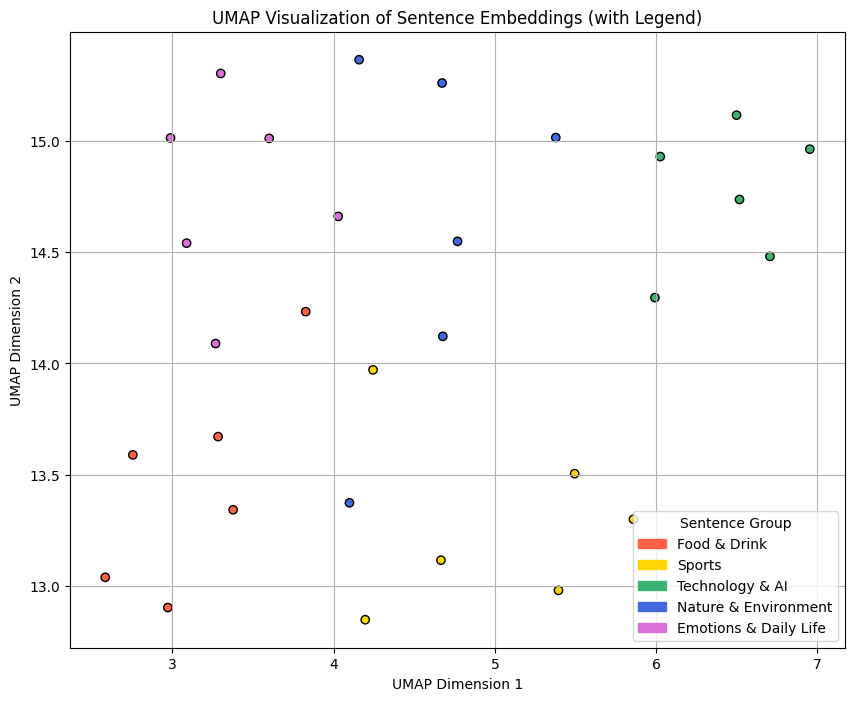

In [ ]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

# Define sentence groups (same order as before)
groups = ['Food & Drink'] * 6 + ['Sports'] * 6 + ['Technology & AI'] * 6 + ['Nature & Environment'] * 6 + ['Emotions & Daily Life'] * 6
group_colors = {
    'Food & Drink': 'tomato',
    'Sports': 'gold',
    'Technology & AI': 'mediumseagreen',
    'Nature & Environment': 'royalblue',
    'Emotions & Daily Life': 'orchid'
}
colors = [group_colors[g] for g in groups]

# Apply UMAP to reduce embeddings to 2 dimensions
reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = reducer.fit_transform(embeddings)

# Plot UMAP results
plt.figure(figsize=(10, 8))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=colors, edgecolors='k')                    #From Chat GPT 9:00pm 3/26/25

# Create legend
legend_handles = [Patch(color=color, label=group) for group, color in group_colors.items()]
plt.legend(handles=legend_handles, title="Sentence Group", loc="best", fontsize=10)

plt.title('UMAP Visualization of Sentence Embeddings (with Legend)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.grid(True)
plt.show()


##UMAP Plot Description:
This UMAP plot presents the sentence embeddings in a two-dimensional space, color-coded by sentence group. Compared to PCA and t-SNE, UMAP displays some of the clearest category-wise separation, particularly for Technology & AI (green), Emotions & Daily Life (purple), and Food & Drink (red). The method maintains both local and some global structure, making it well-suited for preserving overall relationships between clusters. UMAP tends to produce more stable and interpretable layouts, which is evident in how semantically similar sentences are visually grouped.

## Final Conclusion:
In this notebook, we explored how sentence embeddings from a pretrained language model can be better understood through dimensionality reduction and visualization techniques. Starting with a diverse set of grouped sentences, we used PCA, t-SNE, and UMAP to project these high-dimensional embeddings into a 2D space. Each method offered a unique perspective: PCA captured general variance and gave a rough idea of grouping, t-SNE revealed clearer local clusters, and UMAP provided a balance of both local and global structure with strong semantic separation.

By comparing the three methods, we gained insight into how LLMs interpret and represent textual data at the embedding level. These visualizations show that embeddings do, in fact, reflect meaningful groupings aligned with our sentence categories. Overall, this exercise demonstrates how explainable AI techniques like dimensionality reduction can be powerful tools for interpreting the inner workings of large language models.



##Sources
I have included in the code comments where I have used AI